In [8]:
import pandas as pd
import numpy as np
from numpy import loadtxt

# Reading crime dataset

In [242]:
train_crime = open('train-crime.csv', 'rb')
X_train = loadtxt(train_crime,delimiter = ",")
#print(X_train)
X_train.shape

(1695, 100)

In [113]:
trainR_crime = open('trainR-crime.csv', 'rb')
y_train = loadtxt(trainR_crime,delimiter = ",")
print(y_train)

[-0.2059   -0.33463  -0.89246  ... -0.84955   0.48067   0.094476]


In [98]:
test_crime = open('test-crime.csv', 'rb')
X_test = loadtxt(test_crime,delimiter = ",")
#print(X_test)
#print(X_test.shape)

In [99]:
testR_crime = open('testR-crime.csv', 'rb')
y_test = loadtxt(testR_crime,delimiter = ",")
#print(y_test)
#print(y_test.shape)

# Reading housing dataset

In [235]:
train_housing = open('train-housing.csv', 'rb')
X_train_housing = loadtxt(train_housing,delimiter = ",")
#print(X_train_housing)
X_train_housing.shape

(102, 13)

In [243]:
trainR_housing = open('trainR-housing.csv', 'rb')
y_train_housing = loadtxt(trainR_housing,delimiter = ",")
y_train_housing.shape
#print(y_train_housing)

(102,)

In [241]:
test_housing = open('test-housing.csv', 'rb')
X_test_housing = loadtxt(test_housing,delimiter = ",")
#print(X_test_housing)
#print(X_test_housing.shape)

(404, 13)


In [240]:
testR_housing = open('testR-housing.csv', 'rb')
y_test_housing = loadtxt(testR_housing,delimiter = ",")
#print(y_test_housing)
print(y_test_housing.shape)

(404,)


# Splitting the crime dataset into 10 parts as .1, .2, .3, ..., 1

In [244]:
xtrain1 = X_train[0 : 169, : ]
xtrain2 = X_train[0 : 339, : ]
xtrain3 = X_train[0 : 508, : ]
xtrain4 = X_train[0 : 678, : ]
xtrain5 = X_train[0 : 847, : ]
xtrain6 = X_train[0 : 1017, : ]
xtrain7 = X_train[0 : 1186, : ]
xtrain8 = X_train[0 : 1356, : ]
xtrain9 = X_train[0 : 1525, : ]
xtrain10 = X_train[0 : 1695, : ]

In [245]:
ytrain1 = y_train[:169]
ytrain2 = y_train[:339]
ytrain3 = y_train[:508]
ytrain4 = y_train[:678]
ytrain5 = y_train[:847]
ytrain6 = y_train[:1017]
ytrain7 = y_train[:1186]
ytrain8 = y_train[:1356]
ytrain9 = y_train[:1525]
ytrain10 = y_train[:1695]

# Splitting the housing dataset into 10 parts as .1, .2, .3, ..., 1

In [257]:
xtrain_h1 = X_train_housing[0 : 10, : ]
xtrain_h2 = X_train_housing[0 : 20, : ]
xtrain_h3 = X_train_housing[0 : 30, : ]
xtrain_h4 = X_train_housing[0 : 40, : ]
xtrain_h5 = X_train_housing[0 : 51, : ]
xtrain_h6 = X_train_housing[0 : 61, : ]
xtrain_h7 = X_train_housing[0 : 71, : ]
xtrain_h8 = X_train_housing[0 : 81, : ]
xtrain_h9 = X_train_housing[0 : 91, : ]
xtrain_h10 = X_train_housing[0 : 102, : ]

In [258]:
ytrain_h1 = y_train_housing[:10]
ytrain_h2 = y_train_housing[:20]
ytrain_h3 = y_train_housing[:30]
ytrain_h4 = y_train_housing[:40]
ytrain_h5 = y_train_housing[:51]
ytrain_h6 = y_train_housing[:61]
ytrain_h7 = y_train_housing[:71]
ytrain_h8 = y_train_housing[:81]
ytrain_h9 = y_train_housing[:91]
ytrain_h10 = y_train_housing[:102]

# MSE Function

In [275]:
def MSE(y_test, y_pred):
    MSE = np.square(np.subtract(y_test,y_pred)).mean()
    return MSE

# MLE Function

In [421]:
#w = (λI + ΦTΦ) ^−1 ΦTt.


In [497]:
def MLE(X_train, y_train, X_test, lamb):
    #lamb = 0
    a = np.linalg.pinv(lamb*np.identity(X_train.shape[1]) + np.transpose(X_train).dot(X_train))
    w = a.dot(np.transpose(X_train)).dot(y_train)
    prediction = X_test.dot(w)
    
    return prediction

# Model selection function

In [446]:
def ModelSelection(X_train, y_train):
    phi = X_train
    t = y_train
    N = phi.shape[0]
    d = phi.shape[1]
    alpha0, beta0 = 2,10
    alpha_change,beta_change = 1,1
    while not(alpha_change<=0.001 and beta_change<=0.001):
        A = beta0*np.dot(X_train.T,X_train)
        sn = np.linalg.inv(alpha0*np.identity(d) + A)
        mn = beta0*np.dot(np.dot(sn,X_train.T),y_train)
        lambda_ = np.linalg.eigvals(A)
        gamma = 0
        for i in range(0,len(lambda_)):
            gamma+=(lambda_[i]/(alpha0+lambda_[i]))
            
        alpha1 = gamma/np.dot(mn,mn)
        beta1 = 1/((1/(N-gamma))*(np.dot(np.dot(X_train,mn)-y_train, np.dot(X_train,mn)-y_train)))

        alpha_change = abs(alpha1-alpha0)
        beta_change = abs(beta1 - beta0)

        beta0 = beta1
        alpha0 = alpha1
        
    reg_lambda = alpha0.real/beta0.real
    return alpha0.real, beta0.real, reg_lambda

# Bayesian function

In [447]:
def bayesian(alpha, beta, X_train, y_train, X_test):  
    d = X_train.shape[1]
    A = beta*np.dot(X_train.T,X_train)
    sn = np.linalg.inv(alpha*np.identity(d) + A)
    mn = beta*np.dot(np.dot(sn,X_train.T),y_train)
    prediction = (X_test).dot(mn)
    return prediction

# Task 1

## Part 1

### printing α, β and effective λ for each train size of Crime dataset.

In [448]:
crime={}
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    alpha,beta,l = ModelSelection(x_sub, y_sub)
    crime[r/10]= (round(alpha,4),round(beta,4))

In [449]:
for row in crime:
    print("For partition ",row, "----> alpha:",
          crime[row][0], "beta:",crime[row][1], "lambda:", round(crime[row][0]/crime[row][1],4))

For partition  0.1 ----> alpha: 188.6595 beta: 3.0783 lambda: 61.2869
For partition  0.2 ----> alpha: 284.722 beta: 2.9644 lambda: 96.0471
For partition  0.3 ----> alpha: 266.9901 beta: 2.8472 lambda: 93.7729
For partition  0.4 ----> alpha: 280.4488 beta: 2.8497 lambda: 98.4134
For partition  0.5 ----> alpha: 282.7676 beta: 2.9149 lambda: 97.0077
For partition  0.6 ----> alpha: 263.4755 beta: 2.9623 lambda: 88.9429
For partition  0.7 ----> alpha: 254.1616 beta: 3.0876 lambda: 82.3169
For partition  0.8 ----> alpha: 254.2067 beta: 3.1242 lambda: 81.367
For partition  0.9 ----> alpha: 247.8892 beta: 3.0471 lambda: 81.3525
For partition  1.0 ----> alpha: 239.7163 beta: 3.0853 lambda: 77.6963


### printing α, β and effective λ for each train size of Housing dataset.

In [450]:
housing={}
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    alpha,beta,l = ModelSelection(x_sub, y_sub)
    housing[r/10]= (round(alpha,4),round(beta,4))

In [451]:
for row in housing:
    print("For partition ",[row], "----> alpha:",
          housing[row][0], "beta:",housing[row][1], "lambda:", round(housing[row][0]/housing[row][1],4))

For partition  [0.1] ----> alpha: 17.1157 beta: 55.4313 lambda: 0.3088
For partition  [0.2] ----> alpha: 16.3343 beta: 3.4587 lambda: 4.7227
For partition  [0.3] ----> alpha: 17.0971 beta: 4.3022 lambda: 3.974
For partition  [0.4] ----> alpha: 18.4078 beta: 5.1336 lambda: 3.5857
For partition  [0.5] ----> alpha: 17.8086 beta: 4.4115 lambda: 4.0369
For partition  [0.6] ----> alpha: 19.5364 beta: 4.6913 lambda: 4.1644
For partition  [0.7] ----> alpha: 18.6426 beta: 4.3935 lambda: 4.2432
For partition  [0.8] ----> alpha: 18.9251 beta: 4.5876 lambda: 4.1253
For partition  [0.9] ----> alpha: 16.9791 beta: 4.1692 lambda: 4.0725
For partition  [1.0] ----> alpha: 20.4125 beta: 4.0413 lambda: 5.051


## Part 2

## MLE and Bayesian for crime dataset

In [452]:
mse_mle_crime=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 0)
    mse = MSE(y_test, pred)
    mse_mle_crime.append((r/10, mse))

In [453]:
mse_mle_crime

[(0.1, 1.3002479408653578),
 (0.2, 0.49674272673822173),
 (0.3, 0.4563485564631832),
 (0.4, 0.3871466705963706),
 (0.5, 0.37134261218463643),
 (0.6, 0.36447055412489887),
 (0.7, 0.3548472889039074),
 (0.8, 0.348305392176499),
 (0.9, 0.3463928082505606),
 (1.0, 0.34505693304241475)]

In [454]:
mse_bayesian_crime=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = bayesian(crime[r/10][0],crime[r/10][1],x_sub, y_sub, X_test)
    mse = MSE(y_test, pred)
    mse_bayesian_crime.append((r/10, mse))

In [455]:
mse_bayesian_crime

[(0.1, 0.39706429262398923),
 (0.2, 0.34524708583492175),
 (0.3, 0.3482611984943556),
 (0.4, 0.3378816740262158),
 (0.5, 0.33866577001711773),
 (0.6, 0.3328209555449332),
 (0.7, 0.330776657508738),
 (0.8, 0.33244629863584646),
 (0.9, 0.33213979157960855),
 (1.0, 0.3345435972106512)]

## MLE and Bayesian for housing dataset

In [472]:
mse_mle_housing=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 0)
    mse = MSE(y_test_housing, pred)
    mse_mle_housing.append((r/10, mse))

In [473]:
mse_mle_housing

[(0.1, 47.35835683294497),
 (0.2, 0.6531445531535934),
 (0.3, 0.37328040705891985),
 (0.4, 0.340572258403595),
 (0.5, 0.3644021055620384),
 (0.6, 0.32080556108532426),
 (0.7, 0.314182475882),
 (0.8, 0.29894116465022413),
 (0.9, 0.3195726620376518),
 (1.0, 0.2944326200127151)]

In [458]:
mse_bayesian_housing=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = bayesian(housing[r/10][0],housing[r/10][1],x_sub, y_sub, X_test_housing)
    mse = MSE(y_test_housing, pred)
    mse_bayesian_housing.append((r/10, mse))

In [459]:
mse_bayesian_housing

[(0.1, 0.47393448700451385),
 (0.2, 0.3178536655988658),
 (0.3, 0.3145821480396294),
 (0.4, 0.31017943952079036),
 (0.5, 0.32089205037880114),
 (0.6, 0.2996619685273803),
 (0.7, 0.29424751308687025),
 (0.8, 0.2880966683758234),
 (0.9, 0.30259974587036587),
 (1.0, 0.28849364529076055)]

In [460]:
import matplotlib.pyplot as plt

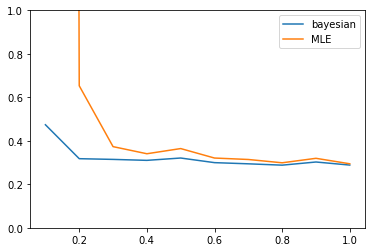

In [491]:
plt.plot(*zip(*mse_bayesian_housing),label='bayesian')
plt.plot(*zip(*mse_mle_housing),label='MLE')
plt.ylim([0,1])
plt.legend()
plt.show()

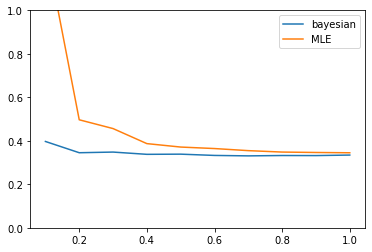

In [492]:
plt.plot(*zip(*mse_bayesian_crime),label='bayesian')
plt.plot(*zip(*mse_mle_crime),label='MLE')
plt.ylim([0,1])
plt.legend()
plt.show()

In [506]:
# We can observe here that as the training size increases, both MLE and the Bayesian performs better.
# That is, with increase in training size, the MSE of both of them decreases.

In [507]:
# We can also observe that Bayesian performs better than MLE for smaller size data and as the data size increases
# the MLE becomes better and better and finally comes close to Bayesian for large dataset

In [508]:
# It is as expected because the Bayesian uses prior alpha, beta and updates them to get closer to minimum. Because of
# that it performs better than the MLE on smaller datasets. 
# MLE doesn't use prior so it is bad for smaller datasets

In [509]:
# But when data size increases the prior is no longer required, so MLE performs similar to Bayesian

## Part 3

## MSE for different values of lambda for housing dataset

In [482]:
lambda_ = [1.0, 33.0, 100.0, 1000.0]
mse_housing_l1=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 1)
    mse = MSE(y_test_housing, pred)
    mse_housing_l1.append((r/10, mse))
mse_housing_l1

[(0.1, 0.423566671346588),
 (0.2, 0.364347103962465),
 (0.3, 0.33395792069853797),
 (0.4, 0.3245221372579648),
 (0.5, 0.3465678845328673),
 (0.6, 0.3121350227356345),
 (0.7, 0.3064930898153738),
 (0.8, 0.29565013092780723),
 (0.9, 0.31340436821154144),
 (1.0, 0.29243562805471485)]

In [483]:
mse_housing_l2=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 33)
    mse = MSE(y_test_housing, pred)
    mse_housing_l2.append((r/10, mse))
mse_housing_l2

[(0.1, 0.6228938094966632),
 (0.2, 0.43120043352934045),
 (0.3, 0.36198910039033505),
 (0.4, 0.34623425073937913),
 (0.5, 0.3535278215760684),
 (0.6, 0.33658550947382065),
 (0.7, 0.31340187896536814),
 (0.8, 0.3109797680403168),
 (0.9, 0.30707758566560717),
 (1.0, 0.30544116862297077)]

In [484]:
mse_housing_l3=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 100)
    mse = MSE(y_test_housing, pred)
    mse_housing_l3.append((r/10, mse))
mse_housing_l3

[(0.1, 0.7528468192512342),
 (0.2, 0.5860306395284415),
 (0.3, 0.4969074236955882),
 (0.4, 0.4652078201136607),
 (0.5, 0.46523221726870506),
 (0.6, 0.43991054865547957),
 (0.7, 0.3927385261620822),
 (0.8, 0.38805650351350507),
 (0.9, 0.368878253417283),
 (1.0, 0.3681112017016033)]

In [485]:
mse_housing_l4=[]
for r in range(1,11):
    s=int(round(len(X_train_housing)*r/10,0))
    x_sub = X_train_housing[:s]
    y_sub = y_train_housing[:s]
    pred = MLE(x_sub, y_sub, X_test_housing, 1000)
    mse = MSE(y_test_housing, pred)
    mse_housing_l4.append((r/10, mse))
mse_housing_l4

[(0.1, 0.953727842908941),
 (0.2, 0.9009342810382331),
 (0.3, 0.863043505399434),
 (0.4, 0.8358504606601795),
 (0.5, 0.8121887269030442),
 (0.6, 0.7845764141233202),
 (0.7, 0.7380347740786489),
 (0.8, 0.7254527905844244),
 (0.9, 0.7114874135618322),
 (1.0, 0.7019701422003521)]

## MSE for different values of lambda for crime dataset

In [500]:
mse_crime_l1=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 1)
    mse = MSE(y_test, pred)
    mse_crime_l1.append((r/10, mse))
mse_crime_l1

[(0.1, 0.6858603980070377),
 (0.2, 0.46291459413209307),
 (0.3, 0.43913106939104),
 (0.4, 0.3807361093289912),
 (0.5, 0.3685403392386222),
 (0.6, 0.36203020128751834),
 (0.7, 0.35245424929419483),
 (0.8, 0.34721311299402213),
 (0.9, 0.3454577265194423),
 (1.0, 0.34476207986660184)]

In [501]:
mse_crime_l2=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 33)
    mse = MSE(y_test, pred)
    mse_crime_l2.append((r/10, mse))
mse_crime_l2

[(0.1, 0.41386083230023096),
 (0.2, 0.3672197335103873),
 (0.3, 0.37007750526177874),
 (0.4, 0.3503675088360638),
 (0.5, 0.34952140373863017),
 (0.6, 0.3421520939712646),
 (0.7, 0.33776025019091327),
 (0.8, 0.33791258111563405),
 (0.9, 0.33695100963174895),
 (1.0, 0.3385348019256801)]

In [502]:
mse_crime_l3=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 100)
    mse = MSE(y_test, pred)
    mse_crime_l3.append((r/10, mse))
mse_crime_l3

[(0.1, 0.38671427974882283),
 (0.2, 0.34464194585171487),
 (0.3, 0.34721774532290106),
 (0.4, 0.33772147306230293),
 (0.5, 0.33837304664555407),
 (0.6, 0.33180639669842815),
 (0.7, 0.3293511730594402),
 (0.8, 0.3311361569946168),
 (0.9, 0.33093739874230965),
 (1.0, 0.3331851548679833)]

In [503]:
mse_crime_l4=[]
for r in range(1,11):
    s=int(round(len(X_train)*r/10,0))
    x_sub = X_train[:s]
    y_sub = y_train[:s]
    pred = MLE(x_sub, y_sub, X_test, 1000)
    mse = MSE(y_test, pred)
    mse_crime_l4.append((r/10, mse))
mse_crime_l4

[(0.1, 0.35176188300956496),
 (0.2, 0.33083123457806146),
 (0.3, 0.3278070039250277),
 (0.4, 0.32228036024027046),
 (0.5, 0.3231409675016109),
 (0.6, 0.31949498622635497),
 (0.7, 0.31914334811655065),
 (0.8, 0.3197029261641157),
 (0.9, 0.31919476904947075),
 (1.0, 0.3204242304587341)]

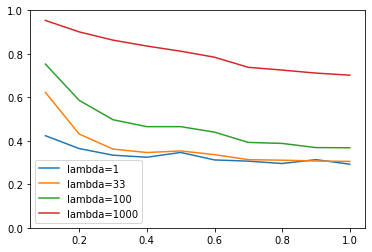

In [504]:
plt.plot(*zip(*mse_housing_l1),label='lambda=1')
plt.plot(*zip(*mse_housing_l2),label='lambda=33')
plt.plot(*zip(*mse_housing_l3),label='lambda=100')
plt.plot(*zip(*mse_housing_l4),label='lambda=1000')
plt.ylim([0,1])
plt.legend()
plt.show()

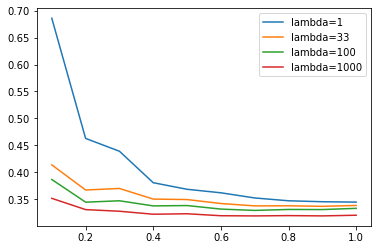

In [505]:
plt.plot(*zip(*mse_crime_l1),label='lambda=1')
plt.plot(*zip(*mse_crime_l2),label='lambda=33')
plt.plot(*zip(*mse_crime_l3),label='lambda=100')
plt.plot(*zip(*mse_crime_l4),label='lambda=1000')
#plt.ylim([0,1])
plt.legend()
plt.show()

In [600]:
# we can't use universal lambda

In [599]:
# It is successful for housing data 

# Task 2

In [ ]:
# reading f3

In [520]:
train_f3 = open('train-f3.csv', 'rb')
X_train_f3 = loadtxt(train_f3,delimiter = ",")
#print(X_train)
X_train_f3.shape

(300,)

In [517]:
trainR_f3 = open('trainR-f3.csv', 'rb')
y_train_f3 = loadtxt(trainR_f3,delimiter = ",")
#print(y_train_f3)
y_train_f3.shape

(300,)

In [518]:
test_f3 = open('test-f3.csv', 'rb')
X_test_f3 = loadtxt(test_f3,delimiter = ",")
#print(X_train)
X_test_f3.shape

(500,)

In [519]:
testR_f3 = open('testR-f3.csv', 'rb')
y_test_f3 = loadtxt(testR_f3,delimiter = ",")
#print(X_train)
y_test_f3.shape

(500,)

In [ ]:
# reading f5

In [521]:
train_f5 = open('train-f5.csv', 'rb')
X_train_f5 = loadtxt(train_f5,delimiter = ",")
#print(X_train)
X_train_f5.shape

(300,)

In [522]:
trainR_f5 = open('trainR-f5.csv', 'rb')
y_train_f5 = loadtxt(trainR_f5,delimiter = ",")
#print(y_train_f3)
y_train_f5.shape

(300,)

In [523]:
test_f5 = open('test-f5.csv', 'rb')
X_test_f5 = loadtxt(test_f5,delimiter = ",")
#print(X_train)
X_test_f5.shape

(500,)

In [524]:
testR_f5 = open('testR-f5.csv', 'rb')
y_test_f5 = loadtxt(testR_f5,delimiter = ",")
#print(X_train)
y_test_f5.shape

(500,)

In [566]:
import math


In [567]:
def bayesian_task2(alpha, beta, X_train, y_train, X_test):  
    d = X_train.shape[1]
    A = beta*np.dot(X_train.T,X_train)
    sn = np.linalg.inv(alpha*np.identity(d) + A)
    mn = beta*np.dot(np.dot(sn,X_train.T),y_train)
    prediction = (X_test).dot(mn)
    return prediction, mn, sn

In [581]:
mse_bayesian_value = []
mse_mle_value = []
logev = []
for i in range(1,11):
    x_train_f3 = np.hstack((np.ones((X_train_f3.shape[0],1)), X_train_f3.reshape(X_train_f3.shape[0],1)))
    x_test_f3 = np.hstack((np.ones((X_test_f3.shape[0],1)), X_test_f3.reshape(X_test_f3.shape[0],1)))
    for j in range(2, i+1):
        x_train_f3 = np.hstack((x_train_f3, (x_train_f3[:,1]**j).reshape(x_train_f3.shape[0],1)))
        x_test_f3 = np.hstack((x_test_f3, (x_test_f3[:,1]**j).reshape(x_test_f3.shape[0],1)))
        
    mle_pred = MLE(x_train_f3, y_train_f3, x_test_f3, 0)
    mse_mle_value.append((i, MSE(y_test_f3, mle_pred)))
    alpha, beta, l = ModelSelection(x_train_f3, y_train_f3)
    bay_pred, mn, sn = bayesian_task2(alpha, beta, x_train_f3, y_train_f3, x_test_f3)
    mse_bayesian_value.append((i, MSE(y_test_f3, bay_pred)))
    
    exp = np.dot((y_train_f3 - np.dot(x_train_f3, mn)).T, (y_train_f3 - np.dot(x_train_f3, mn)))*beta/2
    exp1 = (alpha*np.dot(mn.T, mn))/2
    exp2 = np.log(np.linalg.det(np.linalg.inv(sn)))
    m = x_train_f3.shape[1]
    log = (((m/2)*np.log(alpha))+((300/2)*np.log(beta))-exp-exp1-(0.5*exp2)-(300*np.log(2*math.pi)/2))
    logev.append((i, log))

In [582]:
mse_bayesian_value

[(1, 39376476.35523856),
 (2, 39527143.96946786),
 (3, 96545.25989708769),
 (4, 149527.31579077654),
 (5, 152228.94192618792),
 (6, 165223.4868313984),
 (7, 172103.0795626843),
 (8, 181625.09449402342),
 (9, 178856.84456180208),
 (10, 219943.14242957288)]

In [583]:
mse_mle_value

[(1, 39389142.58553826),
 (2, 39495762.459005706),
 (3, 148429.38836504074),
 (4, 179627.4613192888),
 (5, 186263.56046385024),
 (6, 211370.6069387943),
 (7, 184992.29746071447),
 (8, 196641.43373562046),
 (9, 546257.7764251676),
 (10, 579316.5958698977)]

In [584]:
logev

[(1, -3048.4892729193894),
 (2, -3053.744957338956),
 (3, -2718.8888658439623),
 (4, -2718.9170919003063),
 (5, -2726.8170462141616),
 (6, -2742.4629196159035),
 (7, -2747.637942423453),
 (8, -2761.3960561097224),
 (9, -2777.0257302965797),
 (10, -2794.366141195468)]

In [587]:
mse_bayesian_value1 = []
mse_mle_value1 = []
logev1 = []
for i in range(1,11):
    x_train_f5 = np.hstack((np.ones((X_train_f5.shape[0],1)), X_train_f5.reshape(X_train_f5.shape[0],1)))
    x_test_f5 = np.hstack((np.ones((X_test_f5.shape[0],1)), X_test_f5.reshape(X_test_f5.shape[0],1)))
    for j in range(2, i+1):
        x_train_f5 = np.hstack((x_train_f5, (x_train_f5[:,1]**j).reshape(x_train_f5.shape[0],1)))
        x_test_f5 = np.hstack((x_test_f5, (x_test_f5[:,1]**j).reshape(x_test_f5.shape[0],1)))
        
    mle_pred = MLE(x_train_f5, y_train_f5, x_test_f5, 0)
    mse_mle_value1.append((i, MSE(y_test_f5, mle_pred)))
    alpha, beta, l = ModelSelection(x_train_f5, y_train_f5)
    bay_pred, mn, sn = bayesian_task2(alpha, beta, x_train_f5, y_train_f5, x_test_f5)
    mse_bayesian_value1.append((i, MSE(y_test_f5, bay_pred)))
    
    exp = np.dot((y_train_f5 - np.dot(x_train_f5, mn)).T, (y_train_f5 - np.dot(x_train_f5, mn)))*beta/2
    exp1 = (alpha*np.dot(mn.T, mn))/2
    exp2 = np.log(np.linalg.det(np.linalg.inv(sn)))
    m = x_train_f5.shape[1]
    log = (((m/2)*np.log(alpha))+((300/2)*np.log(beta))-exp-exp1-(0.5*exp2)-(300*np.log(2*math.pi)/2))
    logev1.append((i, log))

In [588]:
mse_bayesian_value1

[(1, 341402524666.3644),
 (2, 341325166345.9245),
 (3, 17502035333.632584),
 (4, 17478864421.527435),
 (5, 54265.26317118945),
 (6, 69168.48310862089),
 (7, 92511.06896837348),
 (8, 96676.96643826309),
 (9, 105738.05477979768),
 (10, 103636.20149133497)]

In [589]:
mse_mle_value1

[(1, 341642661126.0123),
 (2, 341195638304.25635),
 (3, 17465602121.938595),
 (4, 17435655143.616207),
 (5, 61375.346700692135),
 (6, 79043.04992100339),
 (7, 92512.84946313873),
 (8, 90189.90520350951),
 (9, 126835.2836694603),
 (10, 7703653.1846193625)]

In [590]:
logev1

[(1, -4393.813804817335),
 (2, -4397.8343350130945),
 (3, -3960.023711170577),
 (4, -3966.059713354173),
 (5, -2733.785768534937),
 (6, -2742.735597852743),
 (7, -2752.6670780749328),
 (8, -2766.1591228082693),
 (9, -2781.242836047037),
 (10, -2798.336281899438)]

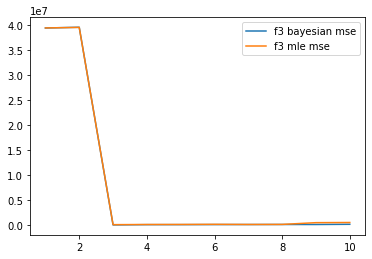

In [592]:
plt.plot(*zip(*mse_bayesian_value),label='f3 bayesian mse')
plt.plot(*zip(*mse_mle_value),label='f3 mle mse')

plt.legend()
plt.show()

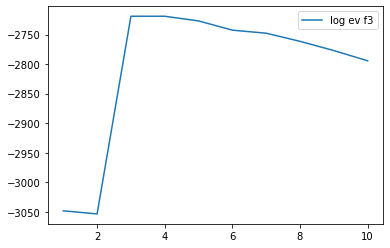

In [596]:
plt.plot(*zip(*logev),label='log ev f3')
plt.legend()
plt.show()

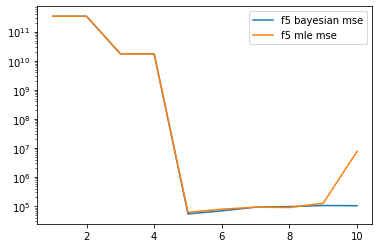

In [597]:
plt.plot(*zip(*mse_bayesian_value1),label='f5 bayesian mse')
plt.plot(*zip(*mse_mle_value1),label='f5 mle mse')
plt.yscale('log')
plt.legend()
plt.show()

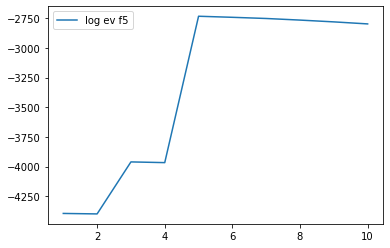

In [598]:
plt.plot(*zip(*logev1),label='log ev f5')
plt.legend()
plt.show()

In [601]:
# the evidence maximization is successful in selecting alpha, beta and d

In [602]:
# even non regularizeed regression performs relatively good as compared to bayesian